# Credit Risk Assessment Using Machine Learning Techniques

Credit is a must in financial systems. For all financial institutions, whose role is to allocate credit, it is necessary to fully understand the risk behind it and to correctly decide who to give credit and who not. To do so, they make use of credit scoring, which is one of the most successful application of statistical and operational research modelling in finance.

The aim of this thesis is to combine supervised and unsupervised machine learning models to predict the probability of default of a set of individuals who asked a loan to a bank, and to correctly classify them according to their individual propensity to default.


## Data Set Description
A significant problem for credit scoring models which must be pointed out is the unavailability of real-world credit data. The reason is that customer’s credit data is confidential in most of the financial institutions. For these reasons we will use a public data set from Kaggle.

Kaggle is an online community of data scientists and machine learning
pratictioners that offers machine learning competitions and a public data
platform.

The data set contains information on clients who have taken out a loan with
an unspecified financial institution. The aims of the analysis is to search for
statistical relationships that could give us some insights about the the risk
of credit and to develop some algorithms to predict credit default. Given
that the context of the data set is not fully explained, we are not going to
take into account external macroeconomic events, which could completely
change the results of the analysis. For instance, different countries could
have different loan’s requirement, or different phases of the economic cycle
could end up in a very different scenario.

Another important fact to which one must draw attention is that we will
assume the data set to be not distorted by a credit score system. This
means that no systematic screening of the costumers’ credit standing had
been implemented until the date of data retrieval.

The data set contains 12 attributes and 32581 observations, and its structure is resumed in Table below.
The potential covariates describe both customers and loans characteristics. As we can see there are both numerical and categorical variables. Let us see a little more in details which are the levels of the categorical ones.

![](https://i.imgur.com/JPlfCww.jpg)

* person_home_hownership has four levels: Mortage, Own, Rent and
Others
* loan_intent has six different levels: Debt consolidation, Education,
Home improvement, Medical, Personal, Venture
* loan_grade has seven levels: A, B, C, D, E, F, G. Th grade takes
into account a combination of several indicators of credit risk from the
credit report and loan application. These factors may include the level
of guarantor support, repayment history, cash flow, projected yearly expenses, etc.
* cb_person_default_on_file has only two level: Y if the client has
already had a default, N otherwise
* loan_status is the response variable and has two levels: 0 represent
non default, 1 represent default.


## 1. Import library

In [5]:
# Import scikit-plot
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px 
import plotly.graph_objects as go 
from plotly.subplots import make_subplots 
from matplotlib import rcParams 
from optbinning import OptimalBinning

from sklearn.model_selection import train_test_split, learning_curve, RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, confusion_matrix, classification_report

In [47]:
df = pd.read_csv('credit_risk_dataset.csv')
df.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [10]:
for col in df.columns: 
    print(col, ':',len(df[col].value_counts()))

person_age : 58
person_income : 4295
person_home_ownership : 4
person_emp_length : 36
loan_intent : 6
loan_grade : 7
loan_amnt : 753
loan_int_rate : 348
loan_status : 2
loan_percent_income : 77
cb_person_default_on_file : 2
cb_person_cred_hist_length : 29


##  2. Dataset information

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


### 3. Exploratory data analysis
#### 3.1 Explore data, 
##### Phân tích & Visualize

##### Credit Label

In [25]:
#nếu cần thay thế giá trị 
#df['loan_status'] = df['loan_status'].replace([0,1],['good','bad'])

In [48]:
df['loan_status'].value_counts().to_frame()

,count
loan_status,
0,25473
1,7108


***Loan status & person_age***

- Range credit_score của mỗi nhóm Good & Bad như thế nào
- Phân phối credit_score của mỗi nhóm Good & Bad ra sao?
- Bạn có rút ra kết luận/đánh giá gì ko?

In [27]:
df.groupby('loan_status')["person_age"].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
bad,7108.0,27.474676,6.263642,20.0,23.0,26.0,30.0,70.0
good,25473.0,27.807129,6.369669,20.0,23.0,26.0,30.0,144.0


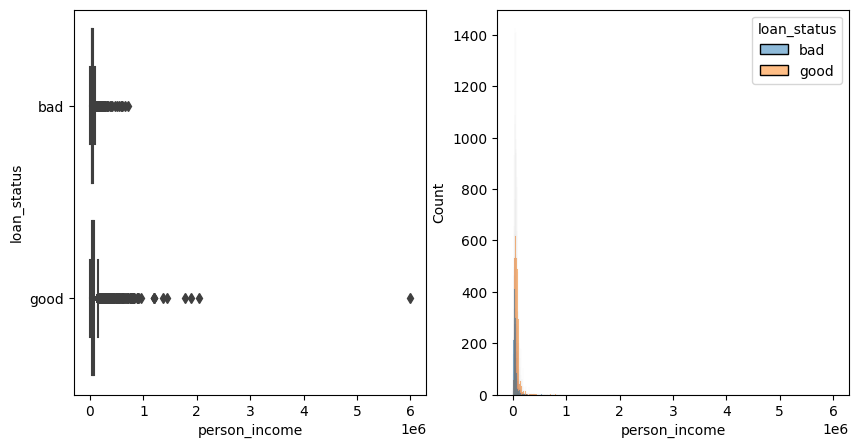

In [29]:
plt.show()
fig, axs = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(data=df, x="person_income", y="loan_status",ax=axs[0])
sns.histplot(data=df, x='person_income',hue='loan_status',ax=axs[1])
plt.show()

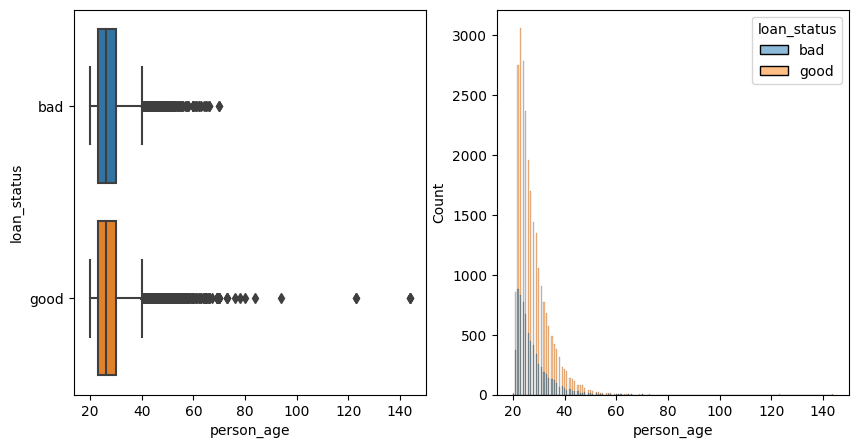

In [30]:
plt.show()
fig, axs = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(data=df, x="person_age", y="loan_status",ax=axs[0])
sns.histplot(data=df, x='person_age',hue='loan_status',ax=axs[1])
plt.show()

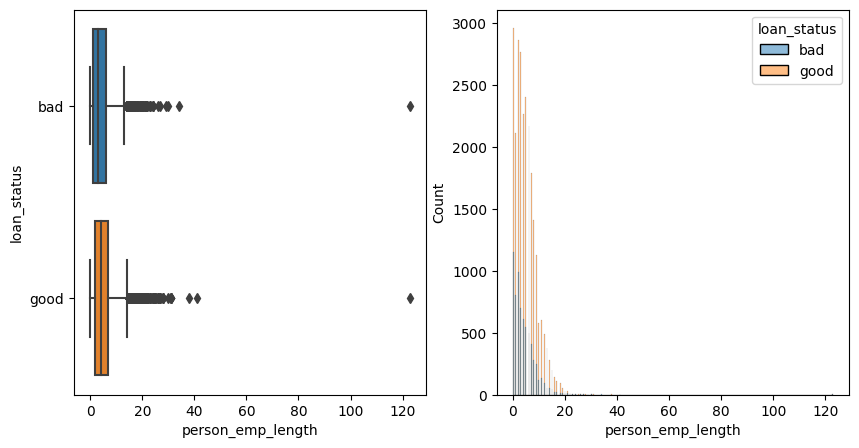

In [31]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(data=df, x="person_emp_length", y="loan_status",ax=axs[0])
sns.histplot(data=df, x='person_emp_length',hue='loan_status',ax=axs[1])
plt.show()

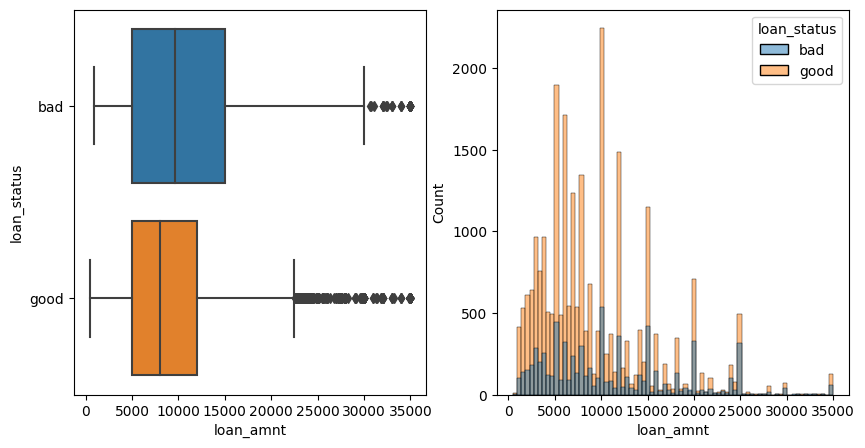

In [32]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(data=df, x="loan_amnt", y="loan_status",ax=axs[0])
sns.histplot(data=df, x='loan_amnt',hue='loan_status',ax=axs[1])
plt.show()

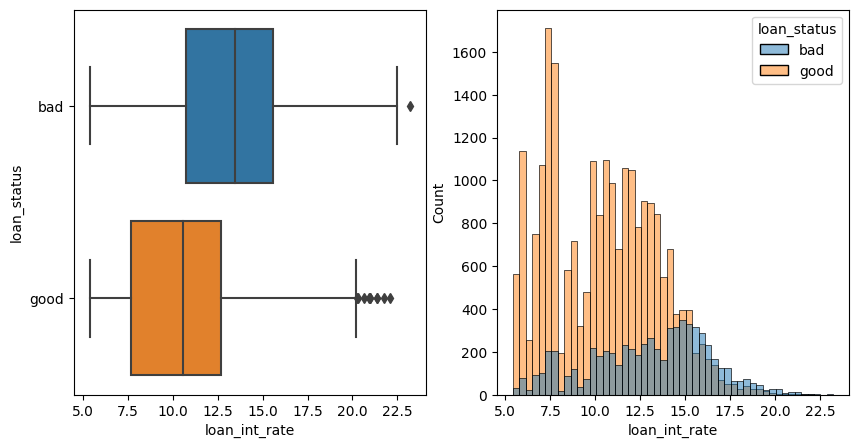

In [41]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(data=df, x="loan_int_rate", y="loan_status",ax=axs[0])
sns.histplot(data=df, x='loan_int_rate',hue='loan_status',ax=axs[1])
plt.show()

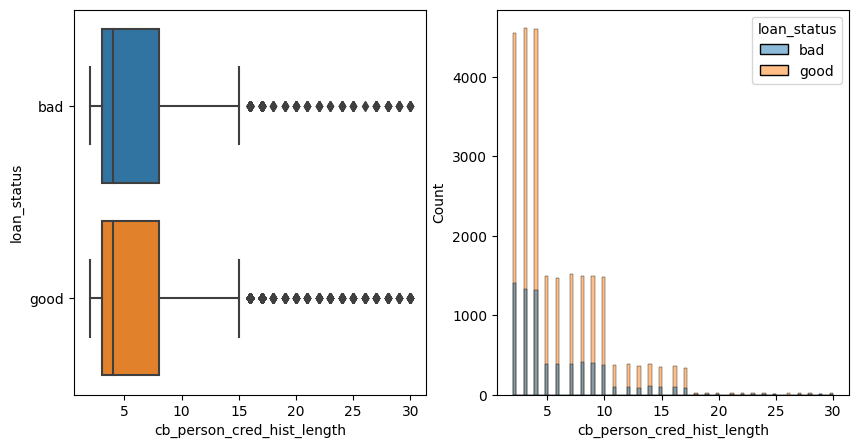

In [43]:
fig, axs = plt.subplots(1,2, figsize=(10,5))
sns.boxplot(data=df, x="cb_person_cred_hist_length", y="loan_status",ax=axs[0])
sns.histplot(data=df, x='cb_person_cred_hist_length',hue='loan_status',ax=axs[1])
plt.show()

#### Categorical Variable

Loan status & Personal home ownership

Tương tự, bạn thấy với số lượng **Loan status** và số **Personal home ownership** được xếp hạng dựa trên tiêu chí nào của bên cho vay này

In [53]:
x = df.groupby('loan_status')["person_home_ownership"].value_counts().to_frame().reset_index()
x = x.pivot(index='loan_status',columns='person_home_ownership',values='count').fillna(0).astype(int)
x

person_home_ownership,MORTGAGE,OTHER,OWN,RENT
loan_status,,,,
0,11754,74,2391,11254
1,1690,33,193,5192


<Axes: xlabel='person_home_ownership', ylabel='loan_status'>

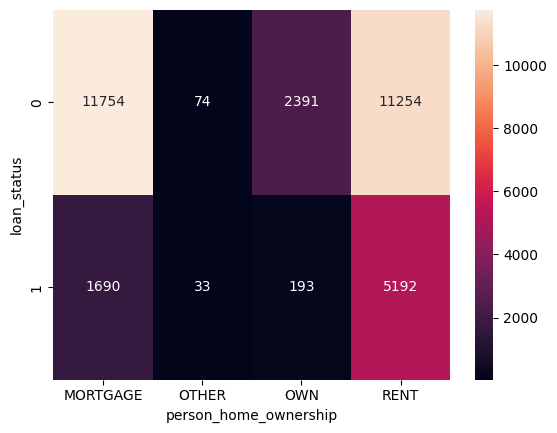

In [54]:
sns.heatmap(x,  annot=True, fmt=".0f")

In [51]:
#    df_geo = df[df['loan_status']==1].groupby(by=['person_home_ownership']).agg('count')

var = 'loan_status' #except feature(below), all variance is True
def df_distribution_categorical(feature):
    df_feature = df.groupby(by=[feature]).agg('count')
    df_feature.reset_index(inplace=True, drop=False)
    df_feature = df_feature[[feature, var]]
    df_feature.rename(inplace=True, columns={var:'count'})

    df_feature_1 = df[df['loan_status']==1].groupby(by=[feature]).agg('count')
    df_feature_1.reset_index(inplace=True, drop=False)
    df_feature_1 = df_feature_1[[feature, var]]
    df_feature_1.rename(inplace=True, columns={var:'count'})
    
    df_feature['count_default'] = df_feature_1['count']
    df_feature['default_ratio'] = df_feature['count_default']/df_feature['count']
    print(df_feature)


In [52]:
df_distribution_categorical('person_home_ownership')

  person_home_ownership  count  count_default  default_ratio
0              MORTGAGE  13444           1690       0.125707
1                 OTHER    107             33       0.308411
2                   OWN   2584            193       0.074690
3                  RENT  16446           5192       0.315700


##### we continue to describe dataframe for every catalog in variable

In [223]:
df_m = df[df['person_home_ownership']=='MORTGAGE']
df_m.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,13444.000000,1.344400e+04,13093.000000,13444.000000,12122.000000,13444.000000,13444.000000,13444.000000
mean,27.980735,8.112712e+04,5.883907,10574.460726,10.488001,0.125707,0.151328,5.922493
std,6.295921,7.876525e+04,4.383934,6789.579286,3.298739,0.331531,0.097026,4.017973
min,20.000000,7.904000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,24.000000,5.000000e+04,3.000000,5400.000000,7.510000,0.000000,0.080000,3.000000
50%,26.000000,6.900000e+04,5.000000,9200.000000,10.380000,0.000000,0.130000,4.000000
75%,30.000000,9.600000e+04,8.000000,14756.250000,12.965000,0.000000,0.200000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,22.480000,1.000000,0.830000,30.000000


Age and income are not too different the loan_status is clear with the highest rate belong to RENT.

In [58]:
#nếu cần thay thế giá trị 
#df['loan_status'] = df['loan_status'].replace([0,1],['good','bad'])

**Loan status & loan_intent**

Ý định vay và tình trạng vay

In [69]:
x = df.groupby('loan_status')["loan_intent"].value_counts().to_frame().reset_index()
x = x.pivot(index='loan_status',columns='loan_intent',values='count').fillna(0).astype(int).T.sort_values(1)[::-1]
x

loan_status,0,1
loan_intent,,
MEDICAL,4450,1621
DEBTCONSOLIDATION,3722,1490
EDUCATION,5342,1111
PERSONAL,4423,1098
HOMEIMPROVEMENT,2664,941
VENTURE,4872,847


<Axes: xlabel='1', ylabel='loan_intent'>

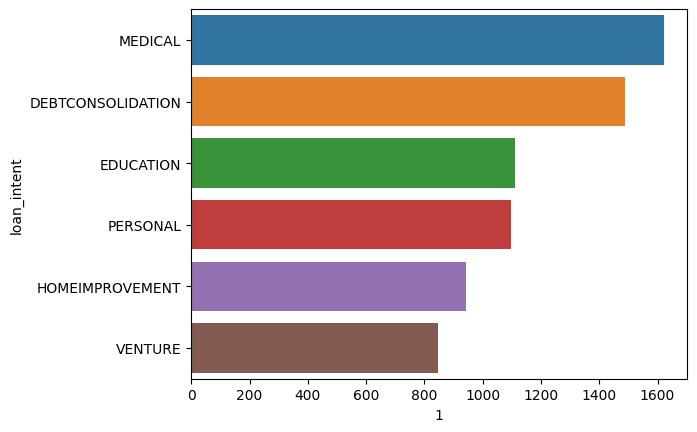

In [70]:
sns.barplot(x.reset_index(),x=1,y='loan_intent')

In [77]:
x = df['loan_grade'].value_counts().sort_index().to_frame()
x

,count
loan_grade,
A,10777
B,10451
C,6458
D,3626
E,964
F,241
G,64


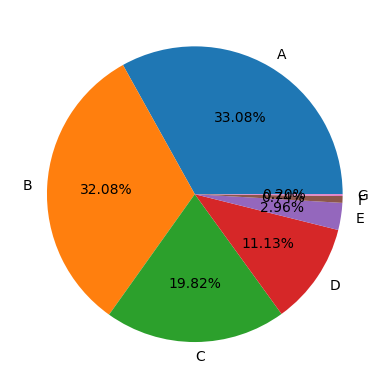

In [80]:
x = df['loan_grade'].value_counts().reset_index()
plt.pie(x['count'],labels=x['loan_grade'],autopct='%.2f%%')
plt.show()

In [57]:
df_distribution_categorical('loan_intent')

         loan_intent  count  count_default  default_ratio
0  DEBTCONSOLIDATION   5212           1490       0.285879
1          EDUCATION   6453           1111       0.172168
2    HOMEIMPROVEMENT   3605            941       0.261026
3            MEDICAL   6071           1621       0.267007
4           PERSONAL   5521           1098       0.198877
5            VENTURE   5719            847       0.148103


**Loan status & loan_grade**

xếp hạng vay (trước khi cho vay) và tình trạng vay

In [59]:
x = df.groupby('loan_status')["loan_grade"].value_counts().to_frame().reset_index()
x = x.pivot(index='loan_status',columns='loan_grade',values='count').fillna(0).astype(int)
x

loan_grade,A,B,C,D,E,F,G
loan_status,,,,,,,
0,9704,8750,5119,1485,343,71,1
1,1073,1701,1339,2141,621,170,63


In [61]:
df_distribution_categorical('loan_grade')

  loan_grade  count  count_default  default_ratio
0          A  10777           1073       0.099564
1          B  10451           1701       0.162760
2          C   6458           1339       0.207340
3          D   3626           2141       0.590458
4          E    964            621       0.644191
5          F    241            170       0.705394
6          G     64             63       0.984375


In [81]:
x = df.groupby('loan_grade')["loan_intent"].value_counts().to_frame().reset_index()
x = x.pivot(index='loan_grade',columns='loan_intent',values='count').fillna(0).astype(int).T
x

loan_grade,A,B,C,D,E,F,G
loan_intent,,,,,,,
DEBTCONSOLIDATION,1753,1620,1042,600,144,43,10
EDUCATION,2174,2026,1356,657,185,46,9
HOMEIMPROVEMENT,1126,1115,693,487,143,32,9
MEDICAL,1959,2006,1217,658,167,52,12
PERSONAL,1832,1813,1046,643,147,30,10
VENTURE,1933,1871,1104,581,178,38,14


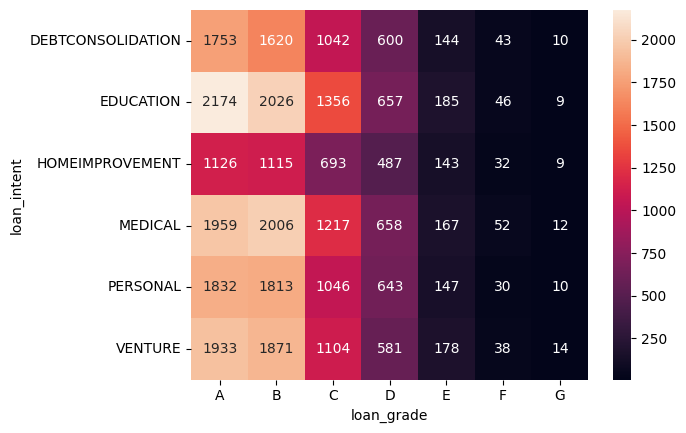

In [83]:
sns.heatmap(x, annot=True, fmt=".0f");

Khá đồng đều khi khách hàng ở cột A, B

In [89]:
x = df.groupby('loan_grade')["person_home_ownership"].value_counts().to_frame().reset_index()
x = x.pivot(index='loan_grade',columns='person_home_ownership',values='count').fillna(0).astype(int).T
x

loan_grade,A,B,C,D,E,F,G
person_home_ownership,,,,,,,
MORTGAGE,5458,4053,2255,1211,339,97,31
OTHER,26,34,17,20,8,2,0
OWN,926,804,495,282,57,15,5
RENT,4367,5560,3691,2113,560,127,28


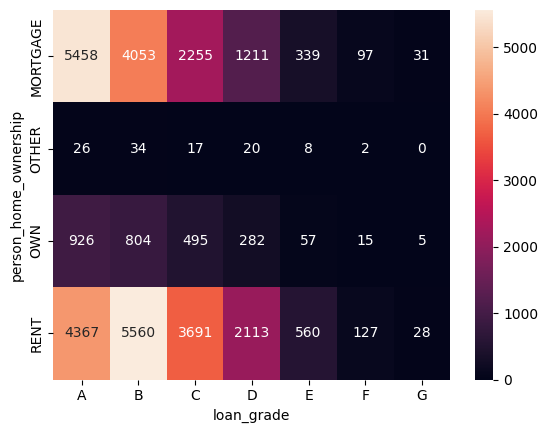

In [91]:
sns.heatmap(x, annot=True, fmt=".0f");

#### Plot trên 2 biến
Trên 2 biến trở lên, chúng ta không có nhiều cách visualize. cũng khó quan sát, nếu dễ quan sát thì thường là do 2 trong 3 biến có điểm tương đồng lớn: vd điểm tín dụng và xếp hạng tín dụng.

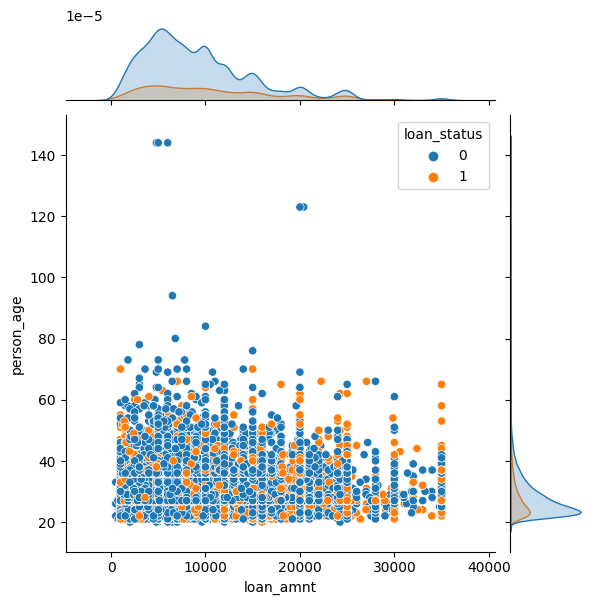

In [88]:
sns.jointplot(df, x='loan_amnt', y='person_age', hue='loan_status');

The peple who has positive historical default have douple higher rate than negative one.

### 3.2. Missing value

#### Drop duplicates

In [92]:
dups = df.duplicated()

In [94]:
df[dups]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15989,23,90000,MORTGAGE,7.0,EDUCATION,B,8000,10.36,0,0.09,N,3
15995,24,48000,MORTGAGE,4.0,MEDICAL,A,4000,5.42,0,0.08,N,4
16025,24,10000,RENT,8.0,PERSONAL,A,3000,7.90,1,0.30,N,3
16028,23,100000,MORTGAGE,7.0,EDUCATION,A,15000,7.88,0,0.15,N,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32010,42,39996,MORTGAGE,2.0,HOMEIMPROVEMENT,A,2500,5.42,0,0.06,N,12
32047,36,250000,RENT,2.0,DEBTCONSOLIDATION,A,20000,7.88,0,0.08,N,17
32172,49,120000,MORTGAGE,12.0,MEDICAL,B,12000,10.99,0,0.10,N,12
32259,39,40000,OWN,4.0,VENTURE,B,1000,10.37,0,0.03,N,16


In [95]:
#test duplicates
df.query("person_age==23 & person_income==42000 &\
person_home_ownership=='RENT' & loan_int_rate==9.99")

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
6464,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4
15975,23,42000,RENT,5.0,VENTURE,B,6000,9.99,0,0.14,N,4


In [96]:
df.shape

(32581, 12)

In [97]:
df.drop_duplicates(inplace=True)

In [98]:
df.shape

(32416, 12)

#### Handling NaN values

In [99]:
df.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              887
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3095
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [100]:
np.round(df.isna().sum()* 100 / df.shape[0], 3)

person_age                    0.000
person_income                 0.000
person_home_ownership         0.000
person_emp_length             2.736
loan_intent                   0.000
loan_grade                    0.000
loan_amnt                     0.000
loan_int_rate                 9.548
loan_status                   0.000
loan_percent_income           0.000
cb_person_default_on_file     0.000
cb_person_cred_hist_length    0.000
dtype: float64

In [101]:
#Should we impute mean, mode, or median?
df['person_emp_length'].describe()

count    31529.00000
mean         4.79051
std          4.14549
min          0.00000
25%          2.00000
50%          4.00000
75%          7.00000
max        123.00000
Name: person_emp_length, dtype: float64

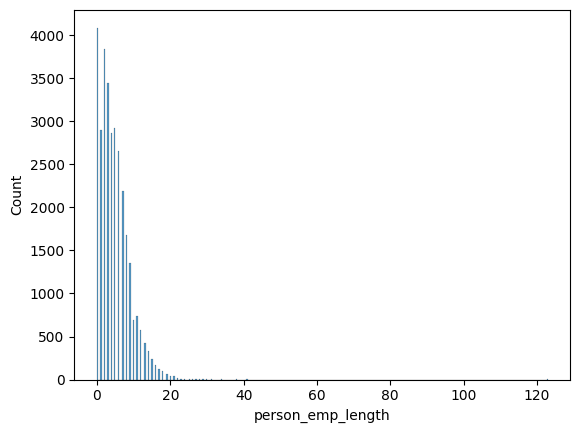

In [102]:
sns.histplot(df['person_emp_length']);
#for col in df.columns:

In [103]:
df['loan_int_rate'].describe()

count    29321.000000
mean        11.017265
std          3.241680
min          5.420000
25%          7.900000
50%         10.990000
75%         13.470000
max         23.220000
Name: loan_int_rate, dtype: float64

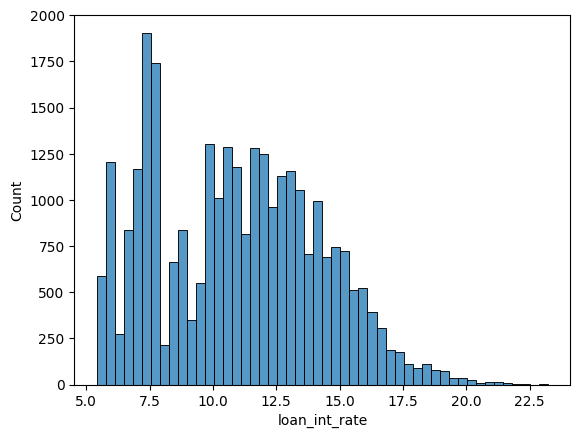

In [104]:
sns.histplot(df['loan_int_rate']);

The distributions of 2 variables person_emp_length and loan_int_rate are skewed, have outliers. Therefore, median imputation is preferred. 

In [105]:
#df.fillna(df.median(), inplace=True) for numeric dataset
#df.loan_int_rate.fillna(df.loan_int_rate.mode()[0], inplace=True) #if mode() add[0]
df.person_emp_length.fillna(df.person_emp_length.median(), inplace=True)
df.loan_int_rate.fillna(df.loan_int_rate.median(), inplace=True)
df.isnull().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

Because loan_percent_income = loan_amnt/person_income, we drop loan_percent_income column.

In [106]:
df[['person_income', 'loan_amnt', 'loan_percent_income']].head()

,person_income,loan_amnt,loan_percent_income
0,59000,35000,0.59
1,9600,1000,0.10
2,9600,5500,0.57
3,65500,35000,0.53
4,54400,35000,0.55


In [107]:
df.drop('loan_percent_income', axis=1, inplace=True)

### 3.3 Detecting and handling outliers
#### Outliers

Because we have already performed boxplots which contain outliers of numeric variable on Exploration data above, we only define function to find whisker and handle outliers in this step.

In [108]:
df_copy = df.copy()

In [109]:
#Find outliers:

def detect_outlier(col):

# first quantile/percentile    
    first_qrt = np.quantile(df_copy[col], 0.25) 
# third quantile/percentile    
    third_qrt = np.quantile(df_copy[col], 0.75)
    
    lower_whisker = first_qrt - (third_qrt -first_qrt )*1.5
    print("lower_whisker:", lower_whisker)
    upper_whisker = third_qrt + (third_qrt -first_qrt )*1.5 
    print("upper whisker:", upper_whisker) 

    outlier = df_copy.loc[(df_copy[col] < lower_whisker) | (df_copy[col] > upper_whisker)]
    print('Number of outliers:', len(outlier))
    print('% outliers: ',len(outlier)*100/len(df_copy),'%')

#return outlier 

In [110]:
#plot boxplot and find the upper and lower whisker to prepare to handle outliers by using scipy.stats
def boxplot(col): 
    plt.figure(figsize=(8,5)) 
    sns.boxplot(y= col, data = df_copy)

In [111]:
#handle outliers by using scipy.stats, not delete them; chủ động handle thì hơn, 
# vì 1 số variable có rất nhiều outliers, nếu handle hết thì sai lệch
# ta chủ động xem outliers và delete data nonsense như age>80 yrs
import scipy.stats

df_cleaned = df_copy.copy() 
def new_df(col, lower_lim, upper_lim): 
    df_cleaned[col] = scipy.stats.mstats.winsorize(df_cleaned[col], limits = [lower_lim, upper_lim])

In [117]:
df.loc[df['person_age']>=80, :]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length


In [118]:
df = df.loc[df['person_age']<80, :]

In [119]:
df.shape

(32408, 11)

In [120]:
df.loc[df['person_emp_length']>=66, :]

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,N,4


In [121]:
df.query("person_age<=person_emp_length+14")

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,Y,3
210,21,192000,MORTGAGE,123.0,VENTURE,A,20000,6.54,0,N,4


In [122]:
df = df.loc[(df['person_emp_length']<66) | (df['person_emp_length'].isna()), :]

In [ ]:
# since we've removed some data from X, we need to pass on these updations to y as well,
# as y doesn't know some of its corresponding X's have been deleted.
y = y[X.index]

##### Check with loan_int_rate                

In [112]:
#Find outliers: 
detect_outlier('loan_int_rate')

lower_whisker: 1.5600000000000014
upper whisker: 20.04
Number of outliers: 70
% outliers:  0.2159427443237907 %


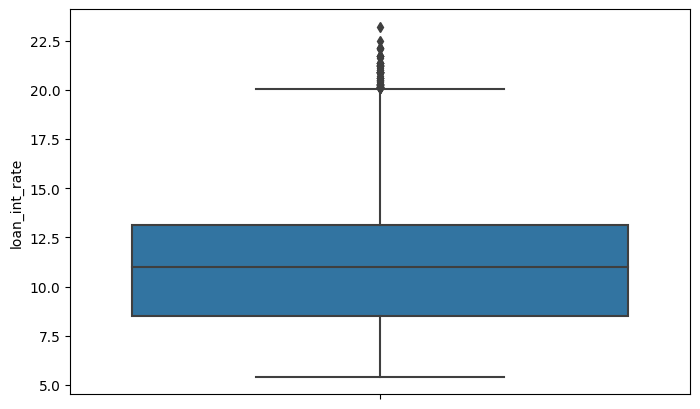

In [113]:
#plot boxplot and find the upper and lower whisker to prepare to handle outliers by using scipy.stats
boxplot('loan_int_rate')

In [251]:
#handle outliers by using scipy.stats; loan_int_rate không cần handle
new_df('loan_int_rate',0, 0.22)

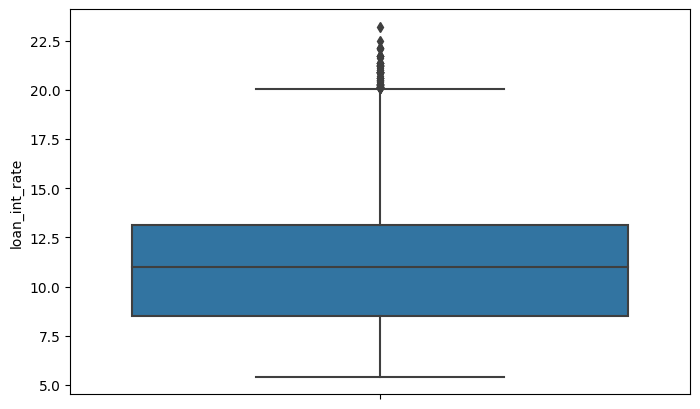

In [114]:
boxplot(df_cleaned['loan_int_rate'])  #df_cleaned not df

We do these for all numeric columns.

<Figure size 200x200 with 0 Axes>

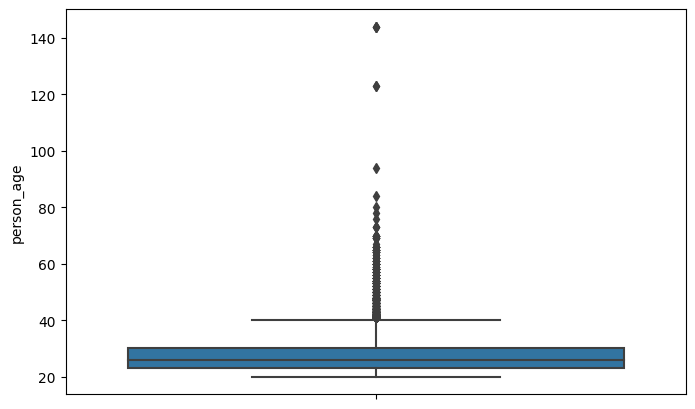

<Figure size 200x200 with 0 Axes>

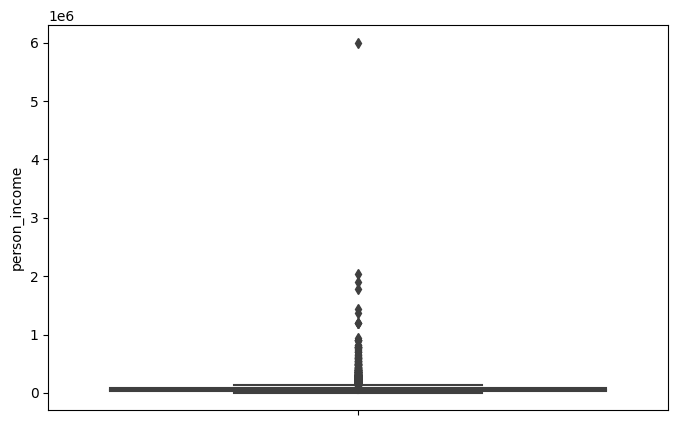

<Figure size 200x200 with 0 Axes>

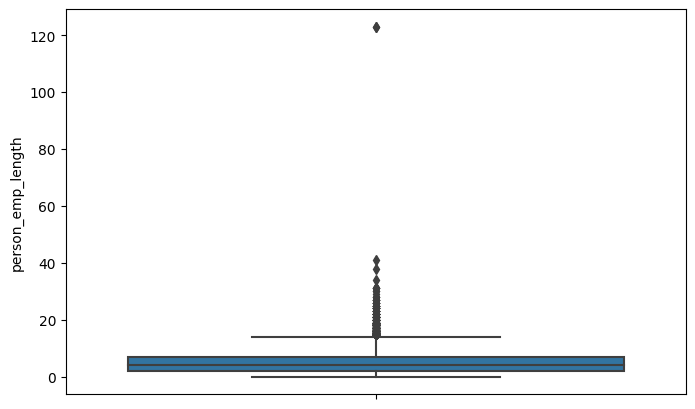

<Figure size 200x200 with 0 Axes>

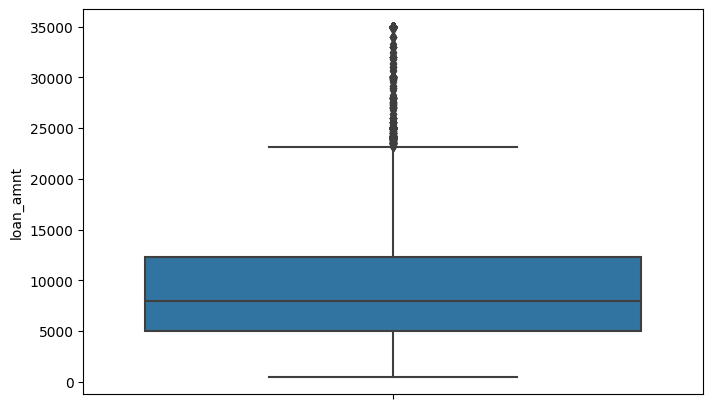

<Figure size 200x200 with 0 Axes>

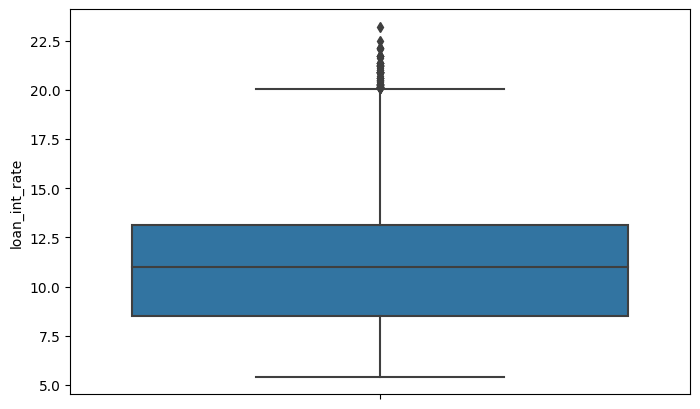

<Figure size 200x200 with 0 Axes>

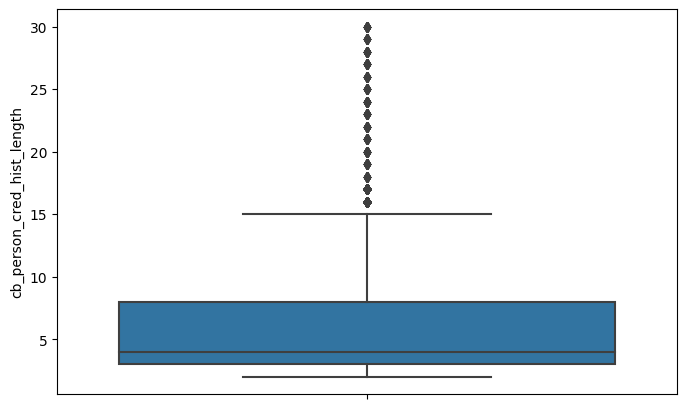

In [115]:
col =['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 
      'loan_int_rate','cb_person_cred_hist_length']
for c in col:
    plt.figure(figsize=(2,2)) 
    boxplot(c)   #this is function we define: def boxplot(col) 

In [254]:
col =['person_age', 'person_income', 'person_emp_length', 'loan_amnt', 
      'loan_int_rate','loan_status','cb_person_cred_hist_length']
detect_outlier('person_age')
print('\n')
detect_outlier('person_income')
print('\n')
detect_outlier('person_emp_length')
print('\n')
detect_outlier('loan_amnt')
print('\n')
detect_outlier('loan_int_rate')
print('\n')
detect_outlier('cb_person_cred_hist_length')

lower_whisker: 12.5
upper whisker: 40.5
Number of outliers: 1491
% outliers:  4.599580454096742 %


lower_whisker: -22472.0
upper whisker: 140232.0
Number of outliers: 1478
% outliers:  4.559476801579467 %


lower_whisker: -5.5
upper whisker: 14.5
Number of outliers: 852
% outliers:  2.6283316880552814 %


lower_whisker: -5875.0
upper whisker: 23125.0
Number of outliers: 1679
% outliers:  5.1795409674234945 %


lower_whisker: 1.5600000000000014
upper whisker: 20.04
Number of outliers: 70
% outliers:  0.2159427443237907 %


lower_whisker: -4.5
upper whisker: 15.5
Number of outliers: 1139
% outliers:  3.5136969397828235 %


We can see at Person_age: whisker: 12.5-40.5 (not min=12.5 and max=40.5), % outliers= 4.599%. Looking to boxplot distribution at above code, outliers of person_age is on the upper part, so are all variables, therefore, we set lower_lim=0, upper_lim=0.046.
With loan_int_rate, the level 20% is realistic, make sense in life, so we don't delete these outliers. 

In [255]:
new_df('person_age',0, 0.046)
new_df('person_income',0, 0.046)
new_df('person_emp_length',0, 0.0263)
new_df('loan_amnt',0, 0.0518)
#new_df('loan_int_rate',0, 0.00216)
new_df('cb_person_cred_hist_length',0, 0.036)

In [256]:
df_cleaned

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,14.0,PERSONAL,D,23100,13.49,1,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,N,3
3,23,65500,RENT,4.0,MEDICAL,C,23100,13.49,1,N,2
4,24,54400,RENT,8.0,MEDICAL,C,23100,13.49,1,Y,4
...,...,...,...,...,...,...,...,...,...,...,...
32576,40,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,N,15
32577,40,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,N,15
32578,40,76000,RENT,3.0,HOMEIMPROVEMENT,B,23100,10.99,1,N,15
32579,40,140000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,N,15


The shape of dataframe and unique values of variables are unchanged.

In [257]:
for col in df_cleaned.columns: 
    print(col, ':',len(df[col].value_counts()))

person_age : 58
person_income : 4295
person_home_ownership : 4
person_emp_length : 36
loan_intent : 6
loan_grade : 7
loan_amnt : 753
loan_int_rate : 348
loan_status : 2
cb_person_default_on_file : 2
cb_person_cred_hist_length : 29


#### Convert categorical variable to numeric type

In [258]:
df_cleaned_dum = pd.get_dummies(df_cleaned)

In [259]:
df_cleaned_dum

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_VENTURE,loan_grade_A,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,59000,14.0,23100,13.49,1,3,False,False,False,...,False,False,False,False,True,False,False,False,False,True
1,21,9600,5.0,1000,11.14,0,2,False,False,True,...,False,False,True,False,False,False,False,False,True,False
2,25,9600,1.0,5500,12.87,1,3,True,False,False,...,False,False,False,True,False,False,False,False,True,False
3,23,65500,4.0,23100,13.49,1,2,False,False,False,...,False,False,False,True,False,False,False,False,True,False
4,24,54400,8.0,23100,13.49,1,4,False,False,False,...,False,False,False,True,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32576,40,53000,1.0,5800,13.16,0,15,True,False,False,...,False,False,False,True,False,False,False,False,True,False
32577,40,120000,4.0,17625,7.49,0,15,True,False,False,...,False,True,False,False,False,False,False,False,True,False
32578,40,76000,3.0,23100,10.99,1,15,False,False,False,...,False,False,True,False,False,False,False,False,True,False
32579,40,140000,5.0,15000,11.48,0,15,True,False,False,...,False,False,True,False,False,False,False,False,True,False


## 4. Modelling

In [260]:
# X and y will be thought of as the entire data
X = df_cleaned_dum.drop('loan_status', axis=1).copy()
y = df_cleaned_dum['loan_status']
#y = y[X.index]
X.shape, y.shape

((32416, 25), (32416,))

In [261]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,  test_size=0.3, 
                                                    stratify=df['loan_status'], shuffle=True)

In [262]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [263]:
y_test.value_counts(normalize=True)  # independent variable is quite imbalance, we can use sampling 

loan_status
0    0.781285
1    0.218715
Name: proportion, dtype: float64

### 4.1. LogisticRegression

In [197]:
logreg = LogisticRegression(random_state= 0).fit(X_train, y_train)

In [198]:
# the accuracy of the model
logreg.score(X_train, y_train)

0.8539509056454101

In [199]:
logreg.score(X_test, y_test)

0.856452442159383

In [200]:
# let's check the model to predict
logreg.predict(X_train[:20])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
      dtype=int64)

In [201]:
y_pred = logreg.predict(X_test)

In [202]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_test, y_pred)

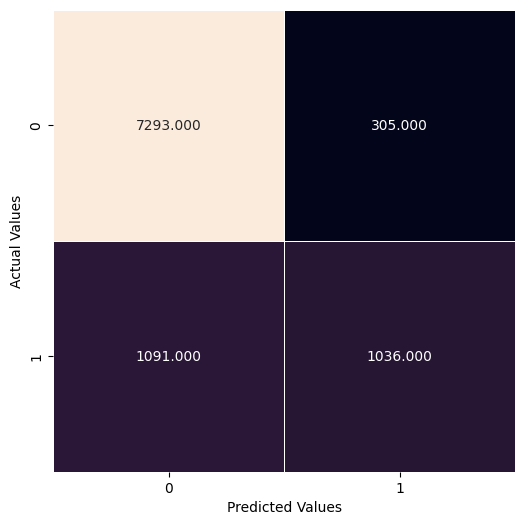

In [203]:
sns.heatmap(cm, annot= True, fmt = '0.3f', linewidth = 0.5,
           square = True, cbar = False)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [204]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      7598
           1       0.77      0.49      0.60      2127

    accuracy                           0.86      9725
   macro avg       0.82      0.72      0.76      9725
weighted avg       0.85      0.86      0.84      9725



In [205]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.856452442159383

### 4.2. Decision Tree Classifier and GridSearchCV

In [206]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=5)

In [207]:
from sklearn.tree import DecisionTreeClassifier 

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [208]:
dt.score(X_train, y_train)

1.0

In [209]:
dt.score(X_test, y_test)

0.8827763496143959

In [210]:
dt1 = DecisionTreeClassifier(max_depth=8)
dt1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

In [211]:
print("training data score: " + str(dt1.score(X_train, y_train)))
print('test data score ' + str(dt1.score(X_test, y_test)))

training data score: 0.9176325415362919
test data score 0.9112596401028278


#### Using DecisionTree model with GridSearchCV 

In [212]:
from sklearn.model_selection import GridSearchCV 
parameters = {'max_depth': [3, 4, 5, 6, 7], 'max_leaf_nodes': [2, 3, 4, 5, 6]}
dt2 = DecisionTreeClassifier()
dt2 = GridSearchCV(dt2, parameters)

In [213]:
dt2.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'max_leaf_nodes': [2, 3, 4, 5, 6]})

In [214]:
print("training data score: " + str(dt2.score(X_train, y_train)))
print('test data score ' + str(dt2.score(X_test, y_test)))

training data score: 0.8359702084526905
test data score 0.836401028277635


In [215]:
dt2.best_params_

{'max_depth': 3, 'max_leaf_nodes': 5}

In [216]:
dt3 = DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5)
dt3.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, max_leaf_nodes=5)

In [217]:
print("training data score: " + str(dt3.score(X_train, y_train)))
print('test data score ' + str(dt3.score(X_test, y_test)))

training data score: 0.8359702084526905
test data score 0.836401028277635


Using GridSearchCV makes our model worse (score go down from 91.2% to 83.6%)

In [218]:
from sklearn.metrics import confusion_matrix
y_pred = dt3.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[7249,  321],
       [1270,  885]], dtype=int64)

In [219]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(7249, 321, 1270, 885)

In [220]:
cm = metrics.confusion_matrix(y_test, y_pred)

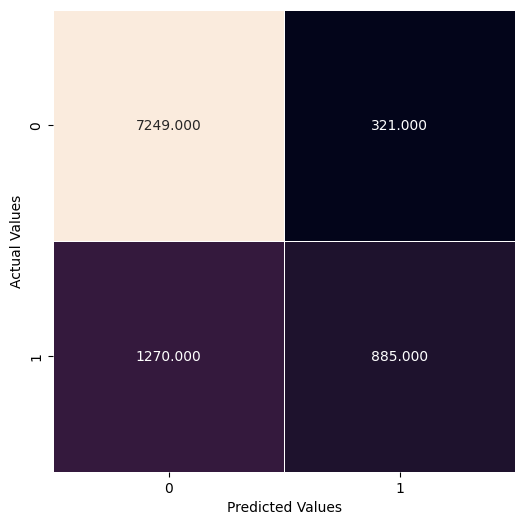

In [221]:
sns.heatmap(cm, annot= True, fmt = '0.3f', linewidth = 0.5,
           square = True, cbar = False)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [222]:
#change from array to series
cm = cm.ravel()
cm = pd.Series(cm)

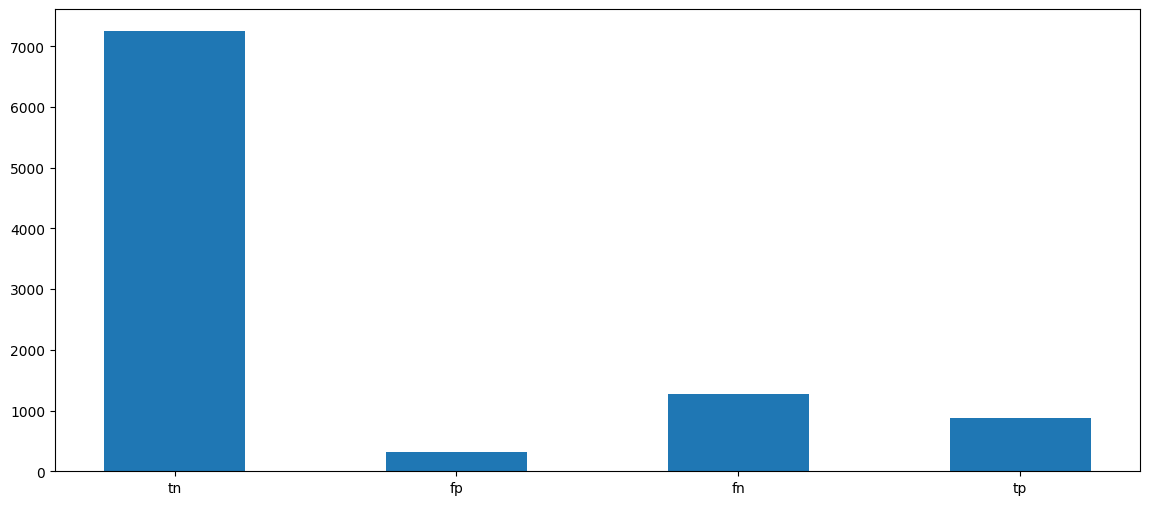

In [223]:
para = ['tn', 'fp', 'fn', 'tp']
plt.bar(para, cm, width = 0.5,data=None)
plt.show()

In [224]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      7570
           1       0.73      0.41      0.53      2155

    accuracy                           0.84      9725
   macro avg       0.79      0.68      0.71      9725
weighted avg       0.82      0.84      0.82      9725



In [225]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.836401028277635

#### check with max_depth=8

In [226]:
dt1 = DecisionTreeClassifier(max_depth=8)
dt1.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8)

In [227]:
print("training data score: " + str(dt1.score(X_train, y_train)))
print('test data score ' + str(dt1.score(X_test, y_test)))

training data score: 0.9175884712000353
test data score 0.912185089974293


In [228]:
from sklearn.metrics import confusion_matrix
y_pred = dt1.predict(X_test)
confusion_matrix(y_test, y_pred)

array([[7482,   88],
       [ 766, 1389]], dtype=int64)

In [229]:
cm = metrics.confusion_matrix(y_test, y_pred)

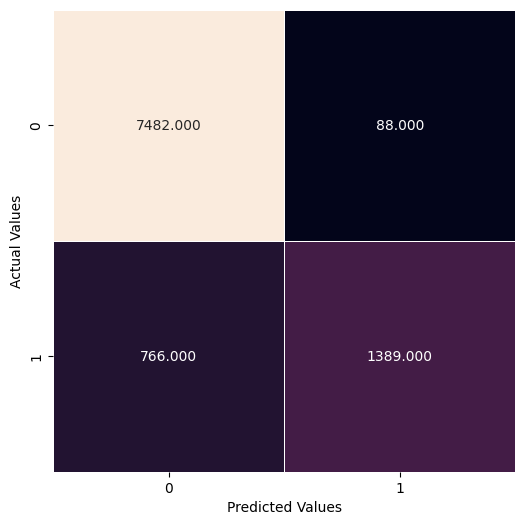

In [230]:
sns.heatmap(cm, annot= True, fmt = '0.3f', linewidth = 0.5,
           square = True, cbar = False)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

With the parameter max_depth=8, we get 768 fn and 95 fp, both lower when applying best_params

In [231]:
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      7570
           1       0.94      0.64      0.76      2155

    accuracy                           0.91      9725
   macro avg       0.92      0.82      0.86      9725
weighted avg       0.91      0.91      0.91      9725



In [232]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.912185089974293

####  Trích xuất dữ liệu total

In [233]:
y_pred_total = dt1.predict(X)
tn, fp, fn, tp = confusion_matrix(y, y_pred_total).ravel()
tn, fp, fn, tp

(25064, 263, 2461, 4628)

In [234]:
cm = metrics.confusion_matrix(y, y_pred_total)

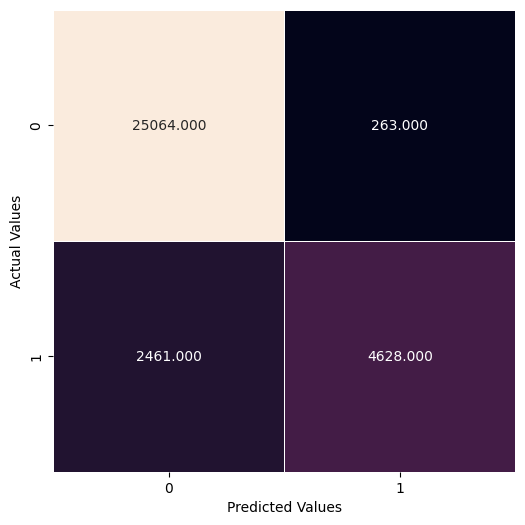

In [235]:
sns.heatmap(cm, annot= True, fmt = '0.3f', linewidth = 0.5,
           square = True, cbar = False)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [343]:
# ghép series/dataframe bằng pd.concat, axis =1 ghép theo cột, axis =0 ghép theo hàng
y_pred_total = pd.Series(y_pred_total)
# khi đổi từ array sang series, đã làm xáo trộn :trong khi y có fixed index còn y_pred thì không nên bị lệch quẻ nếu xuất chung.
# đổi y sang array rồi sang series, ta sẽ mất index của y
# cách tốt nhất là chuyển thành 2 tệp riêng biệt

y_df = pd.concat([y, y_pred_total], axis = 1, ignore_index=True, names=['actual', 'predict'])  
print(type(y_df))

<class 'pandas.core.frame.DataFrame'>


In [344]:
y_df

,0,1
0,1.0,1.0
1,0.0,0.0
2,1.0,1.0
3,1.0,0.0
4,1.0,1.0
...,...,...
32010,NaN,1.0
32047,NaN,0.0
32172,NaN,1.0
32259,NaN,0.0


In [345]:
# cách tốt nhất là chuyển thành 2 tệp riêng biệt rồi copy bằng csv
y.to_csv('y_index.csv')
y_pred_total.to_csv('y_array.csv')

In [346]:
y

0        1
1        0
2        1
3        1
4        1
        ..
32576    0
32577    0
32578    1
32579    0
32580    0
Name: loan_status, Length: 32416, dtype: int64

In [347]:
y_pred_total

0        1
1        0
2        1
3        0
4        1
        ..
32411    0
32412    0
32413    0
32414    0
32415    0
Length: 32416, dtype: int64

### 4.3. Support Vector Machine

In [ ]:
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
#svc = svm.SVC().fit(X_train, y_train)
svc = svm.SVC(C = 0.1, kernel='poly', gamma='auto').fit(X_train, y_train)

In [ ]:
print('Accuracy of SVM classifier on training set: {:.5f}' 
      .format(svc.score(X_train, y_train))) 

print('Accuracy of SVM classifier on test set: {:.5f}'
      .format(svc.score(X_test, y_test)))

In [ ]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
y_pred = svc.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)
cm

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

In [ ]:
sns.heatmap(cm, annot= True, fmt = '0.3f', linewidth = 0.5,
           square = True, cbar = False)
plt.title('Support Vector Machine')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

### 4.4. XGBoost algorithm

sau bước này (ctrl F để tìm):
    y_test.value_counts(normalize=True)

In [264]:
# import libraries for ML 
import xgboost as xgb 
from sklearn.model_selection import KFold, cross_val_score, train_test_split 
from sklearn.metrics import classification_report, confusion_matrix 

In [265]:
#XGBoost Multiclassification Model 
#max_depth is depth of decision tree,learning_rate: tỷ lệ học 
default_xgb_model = xgb.XGBClassifier(max_depth=8, learning_rate=0.1 ,n_jobs=-1).fit(X_train, y_train)

print('Accuracy of XGB classifier on training set: {:.5f}' 
      .format(default_xgb_model.score(X_train, y_train))) 

print('Accuracy of XGB classifier on test set: {:.5f}'
      .format(default_xgb_model.score(X_test, y_test)))

Accuracy of XGB classifier on training set: 0.94848
Accuracy of XGB classifier on test set: 0.93337


In [266]:
from sklearn import metrics
y_pred = default_xgb_model.predict(X_test)
cm = metrics.confusion_matrix(y_test, y_pred)

In [267]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(7529, 69, 579, 1548)

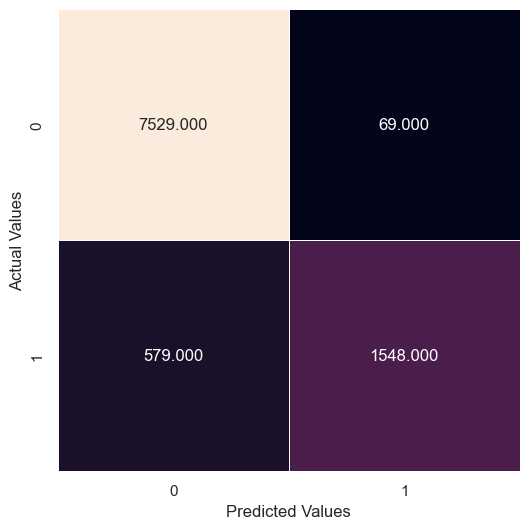

In [268]:
sns.heatmap(cm, annot= True, fmt = '0.3f', linewidth = 0.5,
           square = True, cbar = False)
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [269]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7598
           1       0.96      0.73      0.83      2127

    accuracy                           0.93      9725
   macro avg       0.94      0.86      0.89      9725
weighted avg       0.93      0.93      0.93      9725



In [270]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.9333676092544987

#### Apply XGBoost with GridSearch 

In [271]:
from sklearn.model_selection import GridSearchCV 
parameters = {'max_depth': [4, 5, 6, 7, 8, 9]}   

In [272]:
xgb = xgb.XGBClassifier()
default_xgb_model = GridSearchCV(xgb, parameters)

In [273]:
default_xgb_model.fit(X_train, y_train)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [4, 5, 6, 7, 8, 9]})

In [274]:
print('Accuracy of XGB classifier on training set: {:.6f}' 
      .format(default_xgb_model.score(X_train, y_train))) 

Accuracy of XGB classifier on training set: 0.946543


In [275]:
default_xgb_model.best_params_

{'max_depth': 5}

#### check GridSearch if it is better or not

In [276]:
# import libraries for ML 
import xgboost as xgb 
from sklearn.model_selection import KFold, cross_val_score, train_test_split 
from sklearn.metrics import classification_report, confusion_matrix 

In [277]:
xgb_model = xgb.XGBClassifier(max_depth=5).fit(X_train, y_train)

print('Accuracy of XGB classifier on training set: {:.5f}' 
      .format(xgb_model.score(X_train, y_train))) 
#if error, need run code import advance

Accuracy of XGB classifier on training set: 0.94654


In [278]:
print('Accuracy of XGB classifier on training set: {:.5f}' 
      .format(xgb_model.score(X_test, y_test))) 

Accuracy of XGB classifier on training set: 0.93224


In [279]:
xgb_model = xgb.XGBClassifier(max_depth=8).fit(X_train, y_train)

print('Accuracy of XGB classifier on training set: {:.5f}' 
      .format(xgb_model.score(X_train, y_train))) 

Accuracy of XGB classifier on training set: 0.97929


In [280]:
print('Accuracy of XGB classifier on training set: {:.5f}' 
      .format(xgb_model.score(X_test, y_test))) 

Accuracy of XGB classifier on training set: 0.93460


#### Visualize the result and classification_report

In [281]:
y_pred = xgb_model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[7493,  105],
       [ 531, 1596]], dtype=int64)

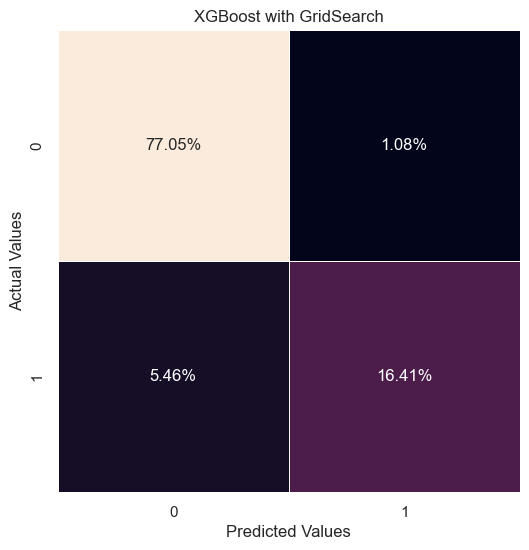

In [282]:
sns.heatmap(cm/np.sum(cm), annot=True, fmt='.2%', linewidth = 0.5,
           square = True, cbar = False) 
plt.title('XGBoost with GridSearch')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.show()

In [283]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.99      0.96      7598
           1       0.94      0.75      0.83      2127

    accuracy                           0.93      9725
   macro avg       0.94      0.87      0.90      9725
weighted avg       0.93      0.93      0.93      9725



Finally, after training four model: Logistic, Support Vector Machine, Decision Tree & XGBoost with GridSearch, we decide to choose XGBoost with the accuracy score of train 95% and 93% with test. 

## 5.Save model

In [284]:
import pickle 

path = "D:\Data science\Python\DA Python quest PC" 
filename = "credit_analysis_xgbmodel.p" 
pickle.dump(xgb_model, open(path+filename, 'wb'))

In [285]:
#Load model 
model = pickle.load(open(path+filename, 'rb'))

In [286]:
model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=8, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

Finally, after training four model: Logistic, Support Vector Machine, Decision Tree & XGBoost with GridSearch, we decide to choose XGBoost with the accuracy score of train 95% and 93% with test. 

## 6. Plot roc curve for these models
#### start from step: from sklearn.preprocessing import StandardScaler

In [191]:
import xgboost as xgb 
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

In [192]:
# X and y will be thought of as the entire data
X = df_cleaned_dum.drop('loan_status', axis=1).copy()
y = df_cleaned_dum['loan_status']
#y = y[X.index]
X.shape, y.shape

((32416, 25), (32416,))

In [193]:
y = y[X.index]
X = X[:1000]
y = y[:1000]
X.shape, y.shape

((1000, 25), (1000,))

In [194]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0,  test_size=0.3, shuffle=True)

In [195]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [196]:
y_test.value_counts(normalize=True)  # independent variable is quite imbalance, we can use sampling 

loan_status
1    0.583333
0    0.416667
Name: proportion, dtype: float64

### 6.2. Conduct model and calculate accuracy score

In [197]:
names = ["Linear_SVM", "RBF_SVM","Polynomial_SVM", "Decision_Tree", "LogisticRegression", "XGBoost"]

classifiers = [
    SVC(kernel="linear", C=0.025, probability=True),
    SVC(kernel="rbf", C=1, gamma=2, probability=True),
    SVC(kernel="poly", degree=3, C=0.025, probability=True),
    DecisionTreeClassifier(max_depth=8),
    LogisticRegression(), 
    xgb.XGBClassifier(max_depth=8, learning_rate=0.1 ,n_jobs=-1)]

In [198]:
scores = []
for name, clf in zip(names, classifiers):
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)
    scores.append(score)

In [199]:
import pandas as pd
import seaborn as sns
df = pd.DataFrame()
df['name'] = names
df['score'] = scores
df

,name,score
0,Linear_SVM,0.753333
1,RBF_SVM,0.606667
2,Polynomial_SVM,0.583333
3,Decision_Tree,0.893333
4,LogisticRegression,0.786667
5,XGBoost,0.903333


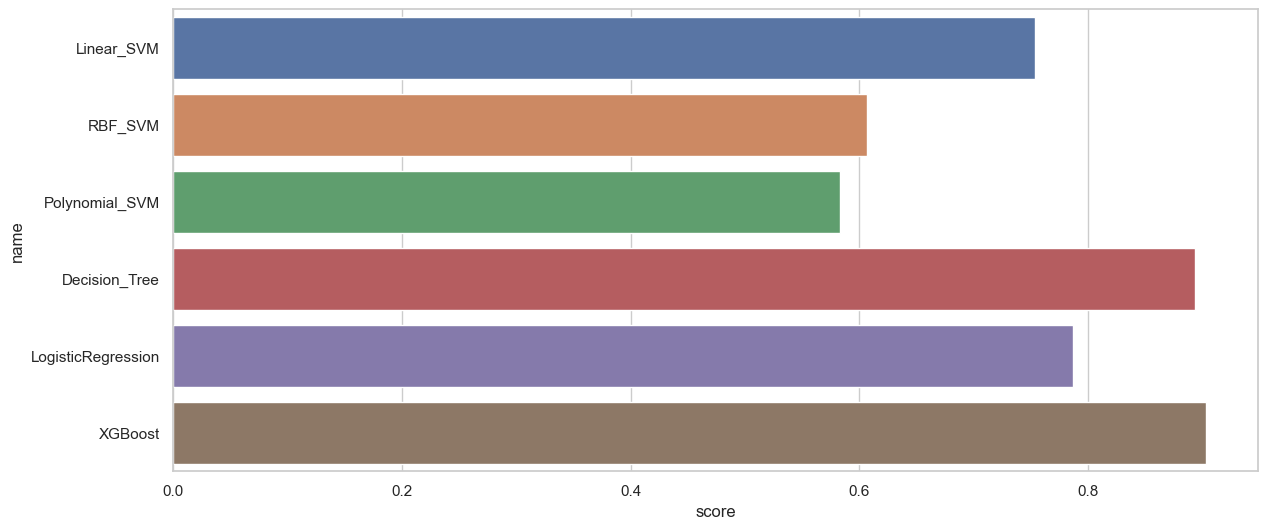

In [200]:
sns.set(style="whitegrid")
ax = sns.barplot(y="name", x="score", data=df)

### 6.3. Plot roc curve by calculate probability by predict_proba

In [201]:
SVC_model_lr = SVC(kernel="linear", C=0.025, probability=True).fit(X_train, y_train)
SVC_model_rbf =  SVC(kernel="rbf", C=1, gamma=2, probability=True).fit(X_train, y_train)
SVC_model_pl = SVC(kernel="poly", degree=3, C=0.025, probability=True).fit(X_train, y_train)
dt_model = DecisionTreeClassifier(max_depth=8).fit(X_train, y_train)
log_model = LogisticRegression().fit(X_train, y_train)
xgb_model = xgb.XGBClassifier(max_depth=5, learning_rate=0.1 ,n_jobs=-1).fit(X_train, y_train)

svm_probs_lr = SVC_model_lr.predict_proba(X_test)
svm_probs_rbf = SVC_model_rbf.predict_proba(X_test)
svm_probs_pl = SVC_model_pl.predict_proba(X_test)
dt_probs = dt_model.predict_proba(X_test)
log_probs = log_model.predict_proba(X_test)
xgb_probs = xgb_model.predict_proba(X_test)

In [202]:
svm_probs_lr = svm_probs_lr[:, 1]
svm_probs_rbf = svm_probs_rbf[:, 1]
svm_probs_pl = svm_probs_pl[:, 1]
dt_probs = dt_probs[:, 1]
log_probs = log_probs[:, 1]
xgb_probs = xgb_probs[:, 1]

In [203]:
from sklearn.metrics import roc_curve, roc_auc_score

svm_lr_auc = roc_auc_score(y_test, svm_probs_lr)
svm_rbf_auc = roc_auc_score(y_test, svm_probs_rbf)
svm_pl_auc = roc_auc_score(y_test, svm_probs_pl)
dt_auc = roc_auc_score(y_test, dt_probs)
log_auc = roc_auc_score(y_test, log_probs)
xgb_auc = roc_auc_score(y_test, xgb_probs)

In [204]:
print('Linear_SVM: AUROC = %.3f' % (svm_lr_auc))
print('RBF_SVM: AUROC = %.3f' % (svm_rbf_auc))
print('Polynomial_SVM: AUROC = %.3f' % (svm_pl_auc))
print('Decision Tree: AUROC = %.3f' % (dt_auc))
print('Logistics: AUROC = %.3f' % (log_auc))
print('XGBoost: AUROC = %.3f' % (xgb_auc))

Linear_SVM: AUROC = 0.848
RBF_SVM: AUROC = 0.757
Polynomial_SVM: AUROC = 0.776
Decision Tree: AUROC = 0.875
Logistics: AUROC = 0.863
XGBoost: AUROC = 0.962


In [205]:
svm_fpr_lr, svm_tpr_lr, _ = roc_curve(y_test, svm_probs_lr)
svm_fpr_rbf, svm_tpr_rbf, _ = roc_curve(y_test, svm_probs_rbf)
svm_fpr_pl, svm_tpr_pl, _ = roc_curve(y_test, svm_probs_pl)
logistic_fpr, logistic_tpr, _ = roc_curve(y_test, dt_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test,log_probs)
xgb_fpr, xgb_tpr, _ = roc_curve(y_test,xgb_probs)

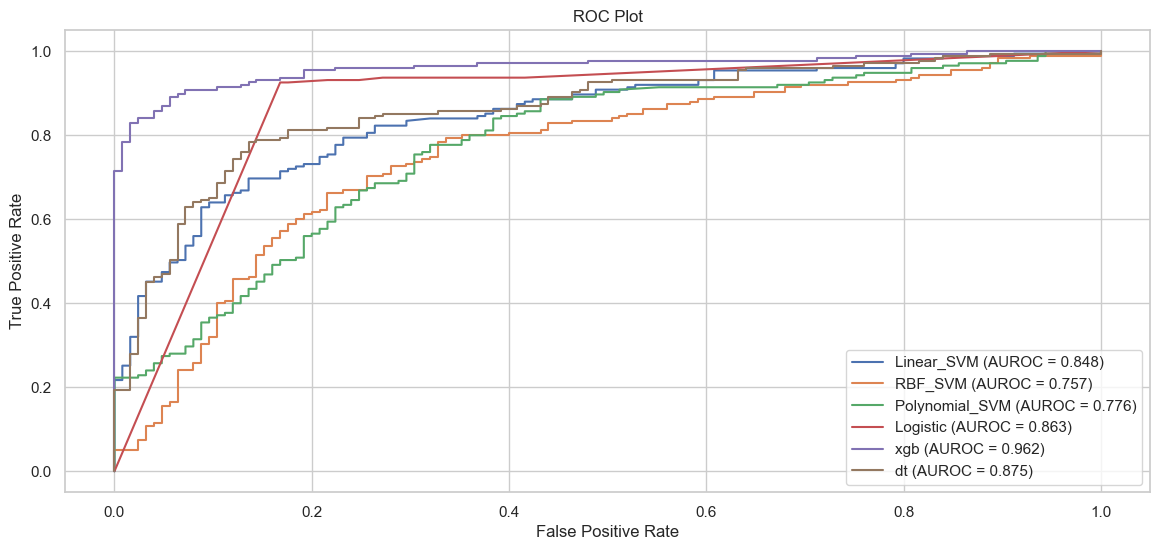

In [206]:
plt.plot(svm_fpr_lr, svm_tpr_lr, linestyle='-', label='Linear_SVM (AUROC = %0.3f)' % svm_lr_auc)
plt.plot(svm_fpr_rbf, svm_tpr_rbf, linestyle='-', label='RBF_SVM (AUROC = %0.3f)' % svm_rbf_auc)
plt.plot(svm_fpr_pl, svm_tpr_pl, linestyle='-', label='Polynomial_SVM (AUROC = %0.3f)' % svm_pl_auc)
plt.plot(logistic_fpr, logistic_tpr, linestyle='-', label='Logistic (AUROC = %0.3f)' % log_auc)
plt.plot(xgb_fpr, xgb_tpr, linestyle='-', label='xgb (AUROC = %0.3f)' % xgb_auc)
plt.plot(dt_fpr, dt_tpr, linestyle='-', label='dt (AUROC = %0.3f)' % dt_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend() # 
# Show plot
plt.show()

In six choosen model, we decide to determine XGBoost model with the highest AUROC = 0.962.